<a href="https://colab.research.google.com/github/kimwonjvn/Term-Project/blob/main/19100249_%EA%B9%80%EC%9B%90%EC%A4%80_Yolov5_Weapon_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Weapon Detection Dataset Download

In [ ]:
!curl -L "https://universe.roboflow.com/ds/NBvnUqyqHg?key=z1bK9DrWVh" > roboflow.zip; unzip roboflow.zip; rm roboflow.zip

Baggage X-ray Detection Dataset Download

In [ ]:
!curl -L "https://universe.roboflow.com/ds/eszKpY6RX1?key=sMJPyIyenm" > roboflow.zip; unzip roboflow.zip; rm roboflow.zip

Install YOLOv5



In [ ]:
%cd /content
!git clone https://github.com/ultralytics/yolov5.git

/content
Cloning into 'yolov5'...
remote: Enumerating objects: 15874, done.
remote: Counting objects: 100% (106/106), done.
remote: Compressing objects: 100% (86/86), done.
remote: Total 15874 (delta 45), reused 56 (delta 20), pack-reused 15768
Receiving objects: 100% (15874/15874), 14.68 MiB | 7.48 MiB/s, done.
Resolving deltas: 100% (10857/10857), done.


Install YOLOv5 Requiremens

In [ ]:
%cd /content/yolov5/
!pip install -r requirements.txt

Make Dataset Folder in content path

Confirm [Data.yaml] file

In [ ]:
%cat /content/dataset/data.yaml

train: ../train/images
val: ../valid/images
test: ../test/images

nc: 5
names: ['Gun', 'Knife', 'Pliers', 'Scissors', 'Wrench']

roboflow:
  workspace: mahmoud-m-hdyxu
  project: x-ray-airport-prohibited-items
  version: 1
  license: CC BY 4.0
  url: https://universe.roboflow.com/mahmoud-m-hdyxu/x-ray-airport-prohibited-items/dataset/1

Make Train/ Valid/ Test Images List in [.txt file]

In [ ]:
%cd /
from glob import glob

train_img_list = glob('/content/dataset/train/images/*.jpg')
val_img_list = glob('/content/dataset/valid/images/*.jpg')
test_img_list = glob('/content/dataset/test/images/*.jpg')

print(len(train_img_list))
print(len(val_img_list))
print(len(test_img_list))

/
5806
1660
829


In [ ]:
with open('/content/dataset/train.txt', 'w') as f:
  f.write('\n'.join(train_img_list) + '\n')

with open('/content/dataset/val.txt', 'w') as f:
  f.write('\n'.join(val_img_list) + '\n')

with open('/content/dataset/test.txt', 'w') as f:
  f.write('\n'.join(test_img_list) + '\n')

Write Each Dataset Path on [data.yaml] file

In [ ]:
import yaml

with open('/content/dataset/data.yaml', 'r') as f:
  data = yaml.safe_load(f)

print(data)

data['train'] = '/content/dataset/train.txt'
data['val'] = '/content/dataset/val.txt'
data['test'] = '/content/dataset/test.txt'

with open('/content/dataset/data.yaml', 'w') as f:
  yaml.dump(data, f)

print(data)

{'train': '../train/images', 'val': '../valid/images', 'test': '../test/images', 'nc': 5, 'names': ['Gun', 'Knife', 'Pliers', 'Scissors', 'Wrench'], 'roboflow': {'workspace': 'mahmoud-m-hdyxu', 'project': 'x-ray-airport-prohibited-items', 'version': 1, 'license': 'CC BY 4.0', 'url': 'https://universe.roboflow.com/mahmoud-m-hdyxu/x-ray-airport-prohibited-items/dataset/1'}}
{'train': '/content/dataset/train.txt', 'val': '/content/dataset/val.txt', 'test': '/content/dataset/test.txt', 'nc': 5, 'names': ['Gun', 'Knife', 'Pliers', 'Scissors', 'Wrench'], 'roboflow': {'workspace': 'mahmoud-m-hdyxu', 'project': 'x-ray-airport-prohibited-items', 'version': 1, 'license': 'CC BY 4.0', 'url': 'https://universe.roboflow.com/mahmoud-m-hdyxu/x-ray-airport-prohibited-items/dataset/1'}}


Training

In [ ]:
%cd /content/yolov5/

!python train.py --img 640 --batch 16 --epochs 50 --data /content/dataset/data.yaml --cfg ./models/yolov5s.yaml --weights yolov5s.pt --name train_result

/content/yolov5
train: weights=yolov5s.pt, cfg=./models/yolov5s.yaml, data=/content/dataset/data.yaml, hyp=data/hyps/hyp.scratch-low.yaml, epochs=50, batch_size=16, imgsz=640, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, bucket=, cache=None, image_weights=False, device=, multi_scale=False, single_cls=False, optimizer=SGD, sync_bn=False, workers=8, project=runs/train, name=baggage_result, exist_ok=False, quad=False, cos_lr=False, label_smoothing=0.0, patience=100, freeze=[0], save_period=-1, seed=0, local_rank=-1, entity=None, upload_dataset=False, bbox_interval=-1, artifact_alias=latest
github: up to date with https://github.com/ultralytics/yolov5 ✅
YOLOv5 🚀 v7.0-203-g0897415 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)

hyperparameters: lr0=0.01, lrf=0.01, momentum=0.937, weight_decay=0.0005, warmup_epochs=3.0, warmup_momentum=0.8, warmup_bias_lr=0.1, box=0.05, cls=0.5, cls_pw=1.0, obj=1.0, obj_pw=1.0, iou_t=0.2, 

Detect Weapon on New Data [Test Image]

detect: weights=['/content/yolov5/runs/train/baggage_result/weights/best.pt'], source=/content/dataset/test/images/P04757_jpg.rf.33ac859da4591daa5694c84b97ade036.jpg, data=data/coco128.yaml, imgsz=[640, 640], conf_thres=0.5, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 v7.0-203-g0897415 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)

Fusing layers... 
YOLOv5s summary: 157 layers, 7023610 parameters, 0 gradients, 15.8 GFLOPs
image 1/1 /content/dataset/test/images/P04757_jpg.rf.33ac859da4591daa5694c84b97ade036.jpg: 640x640 1 Pliers, 11.5ms
Speed: 0.6ms pre-process, 11.5ms inference, 1.7ms NMS per image at shape (1, 3, 640, 640)
Results saved to runs/detect/exp3


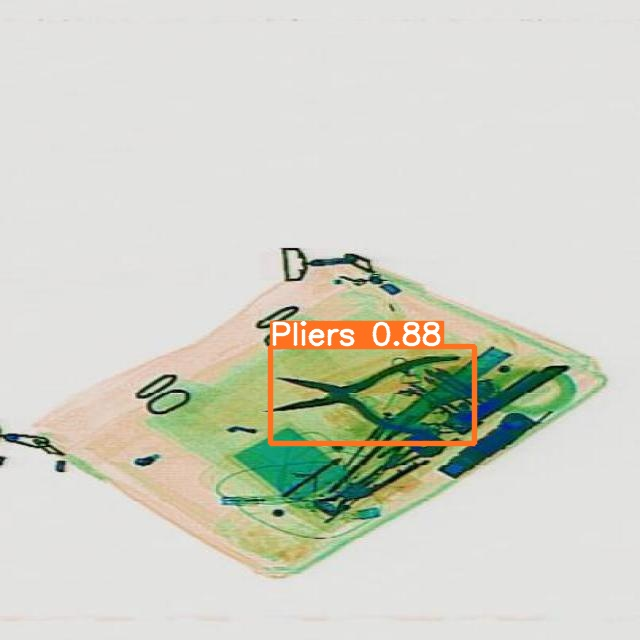

In [ ]:
from IPython.display import Image
import os

test_img_path = test_img_list[0]

!python detect.py --weights /content/yolov5/runs/train/baggage_result/weights/best.pt --img 640 --conf 0.5 --source "{test_img_path}"

Image(os.path.join('/content/yolov5/runs/detect/exp/', os.path.basename(test_img_path)))